In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from utils import data_reader

In [3]:
TAC2008A_folder = "../Data/TAC2008A"
TAC2009A_folder = "../Data/TAC2009A"
TAC2008A = data_reader(TAC2008A_folder)
TAC2009A = data_reader(TAC2009A_folder)

# Pairwise Correlation

### 1. Overall correlation

In [4]:
from utils import compute_correlation_matrix
from plotting_utils import print_matrix, print_scatterplot_matrix
%matplotlib inline

In [5]:
raw_matrix, correlation_matrix = compute_correlation_matrix([TAC2008A, TAC2009A])

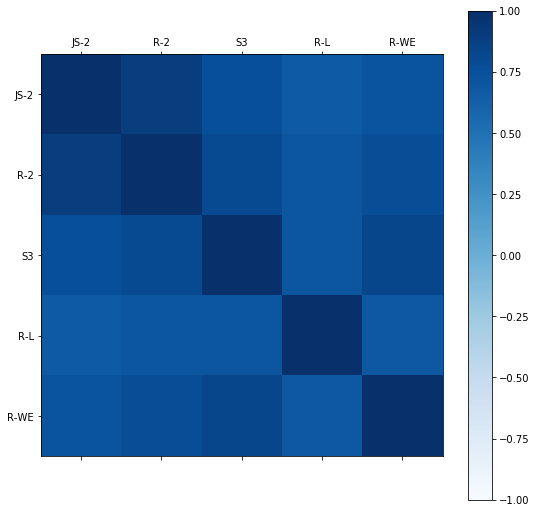

In [6]:
print_matrix(correlation_matrix)

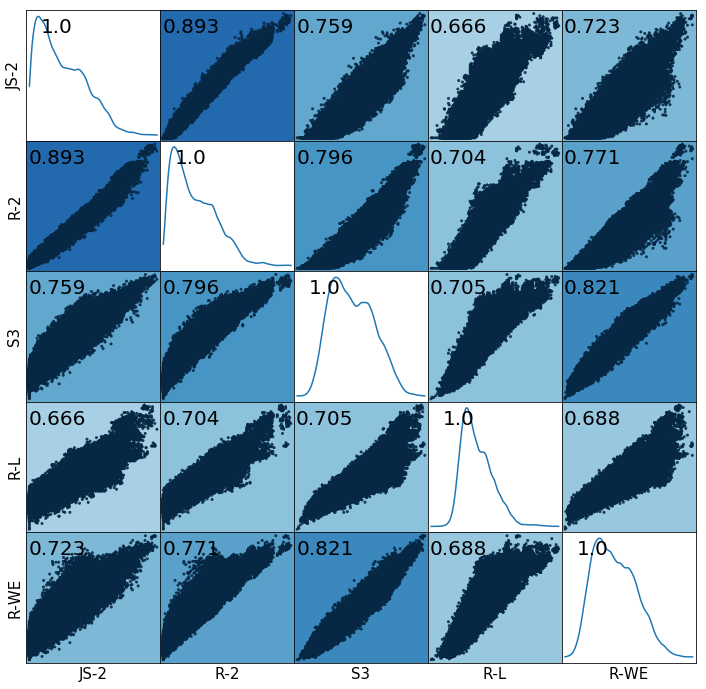

In [7]:
print_scatterplot_matrix(raw_matrix, correlation_matrix)

### 2. Correlation in the high-scoring range

In [8]:
from utils import average_top_corr
from plotting_utils import print_matrix_top, print_scatterplot_matrix_top
%matplotlib inline

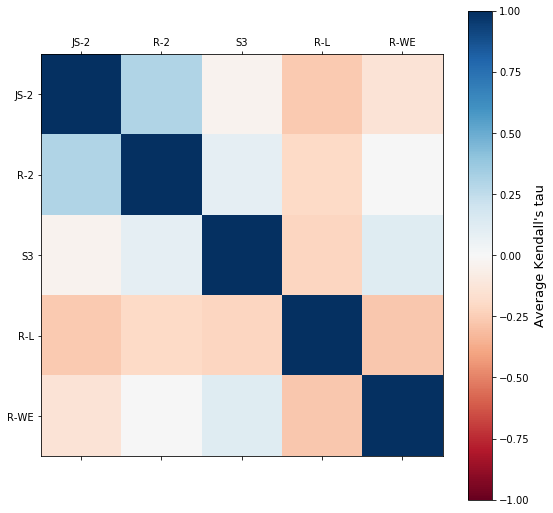

In [9]:
print_matrix_top(average_top_corr([TAC2008A, TAC2009A], top=45))

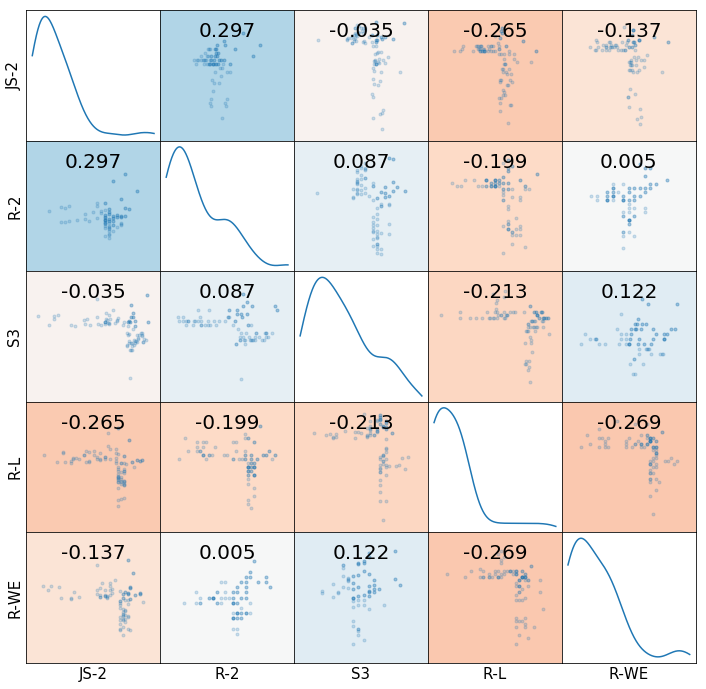

In [10]:
print_scatterplot_matrix_top([TAC2008A, TAC2009A])

# Pairs 

In [11]:
from utils import get_pairwise_disagreement
import pandas as pd
import seaborn as sns; sns.set(color_codes=True)

In [12]:
mat_r2_js2 = get_pairwise_disagreement('ROUGE_2_fitness', 'JS_2_fitness', [TAC2008A, TAC2009A])
mat_r2_r_l = get_pairwise_disagreement('ROUGE_2_fitness', 'ROUGE_L_fitness', [TAC2008A, TAC2009A])
mat_r2_rwe = get_pairwise_disagreement('ROUGE_2_fitness', 'ROUGE_WE_fitness', [TAC2008A, TAC2009A])
mat_r2_s3 = get_pairwise_disagreement('ROUGE_2_fitness', 'S3_Pyr_fitness', [TAC2008A, TAC2009A])
mat_s3_r_l = get_pairwise_disagreement('S3_Pyr_fitness', 'ROUGE_L_fitness', [TAC2008A, TAC2009A])
mat_s3_js2 = get_pairwise_disagreement('S3_Pyr_fitness', 'JS_2_fitness', [TAC2008A, TAC2009A])
mat_s3_rwe = get_pairwise_disagreement('S3_Pyr_fitness', 'ROUGE_WE_fitness', [TAC2008A, TAC2009A])
mat_r_l_rwe = get_pairwise_disagreement('ROUGE_L_fitness', 'ROUGE_WE_fitness', [TAC2008A, TAC2009A])

/Users/peyrardm/Documents/Code-ACL-2019-Metrics/analysis/utils.py:161: RuntimeWarning: invalid value encountered in double_scalars
  data.append(((summary_i[key_a] + summary_j[key_a]) / 2, a_score * b_score / np.abs(a_score * b_score)))


In [13]:
mat_js2_r_l = get_pairwise_disagreement('ROUGE_L_fitness', 'JS_2_fitness', [TAC2008A, TAC2009A])
mat_js2_rwe = get_pairwise_disagreement('ROUGE_WE_fitness', 'JS_2_fitness', [TAC2008A, TAC2009A])

Text(0, 0.5, 'Disagreement (%)')

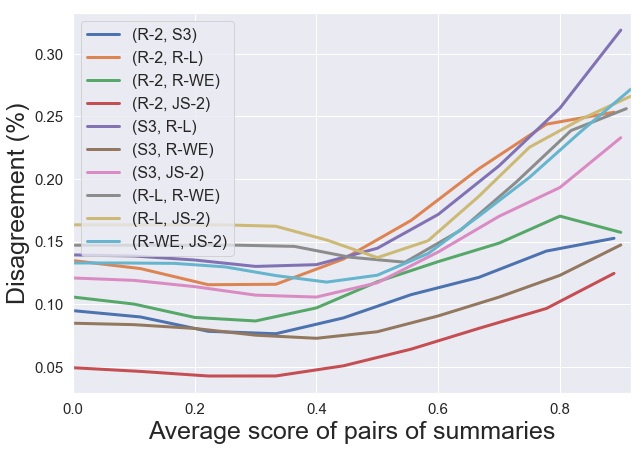

In [14]:
df_random = pd.DataFrame(mat_r2_s3, columns=['average pair score', '(R-2, S3)'])
ax = df_random.plot(x='average pair score', y='(R-2, S3)', figsize=(10, 7), linewidth=3)

df_random = pd.DataFrame(mat_r2_r_l, columns=['average pair score', '(R-2, R-L)'])
ax = df_random.plot(x='average pair score', y='(R-2, R-L)', ax=ax, linewidth=3)

df_random = pd.DataFrame(mat_r2_rwe, columns=['average pair score', '(R-2, R-WE)'])
ax = df_random.plot(x='average pair score', y='(R-2, R-WE)', ax=ax, linewidth=3)

df_random = pd.DataFrame(mat_r2_js2, columns=['average pair score', '(R-2, JS-2)'])
ax = df_random.plot(x='average pair score', y='(R-2, JS-2)', ax=ax, linewidth=3)

df_random = pd.DataFrame(mat_s3_r_l, columns=['average pair score', '(S3, R-L)'])
ax = df_random.plot(x='average pair score', y='(S3, R-L)', ax=ax, linewidth=3)

df_random = pd.DataFrame(mat_s3_rwe, columns=['average pair score', '(S3, R-WE)'])
ax = df_random.plot(x='average pair score', y='(S3, R-WE)', ax=ax, linewidth=3)

df_random = pd.DataFrame(mat_s3_js2, columns=['average pair score', '(S3, JS-2)'])
ax = df_random.plot(x='average pair score', y='(S3, JS-2)', ax=ax, linewidth=3)

df_random = pd.DataFrame(mat_r_l_rwe, columns=['average pair score', '(R-L, R-WE)'])
ax = df_random.plot(x='average pair score', y='(R-L, R-WE)', ax=ax, linewidth=3)

df_random = pd.DataFrame(mat_js2_r_l, columns=['average pair score', '(R-L, JS-2)'])
ax = df_random.plot(x='average pair score', y='(R-L, JS-2)', ax=ax, linewidth=3)

df_random = pd.DataFrame(mat_js2_rwe, columns=['normalized average score of pairs of summaries', '(R-WE, JS-2)'])
ax = df_random.plot(x='normalized average score of pairs of summaries', y='(R-WE, JS-2)', ax=ax, linewidth=3, fontsize=15)

ax.legend(prop={'size': 16})
ax.set_xlabel('Average score of pairs of summaries', fontsize=25)
ax.set_ylabel('Disagreement (%)', fontsize=25)

# Proportion of overall improvements

In [15]:
from utils import proportion_better
from plotting_utils import plot_proportion_improvements

In [16]:
datapoints = proportion_better([TAC2008A, TAC2009A], m=1000)
datapoints.extend(proportion_better([TAC2008A, TAC2009A], m=1000, min_avg=0.2))
datapoints.extend(proportion_better([TAC2008A, TAC2009A], m=1500, min_avg=0.3))
datapoints.extend(proportion_better([TAC2008A, TAC2009A], m=2500, min_avg=0.35))

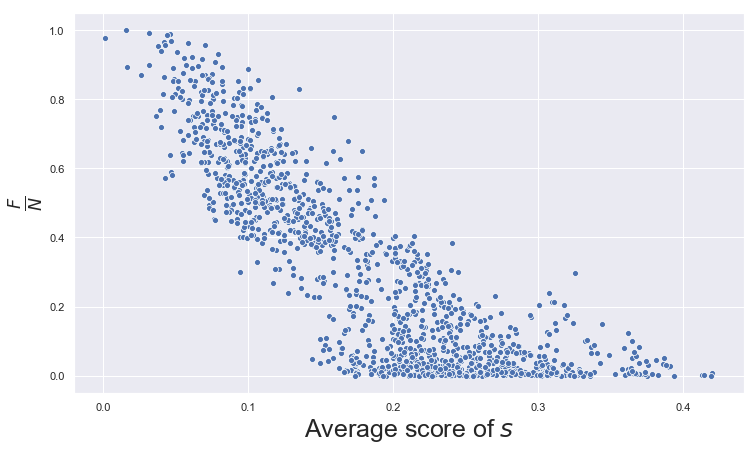

In [17]:
plot_proportion_improvements(datapoints)